In [48]:
import pandas as pd

In [49]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<Axes: xlabel='satisfaction_level'>

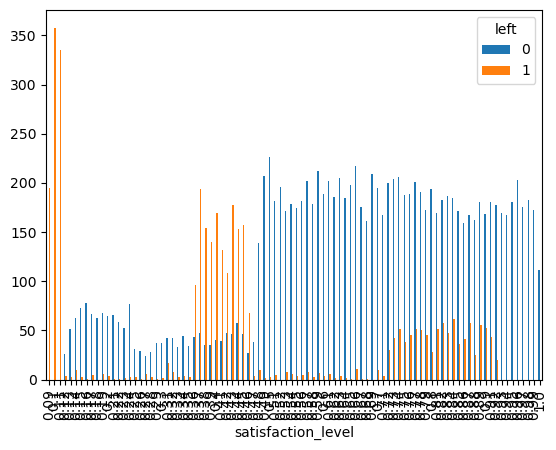

In [50]:
pd.crosstab(df['satisfaction_level'], df['left']).plot(kind='bar')


<Axes: xlabel='salary'>

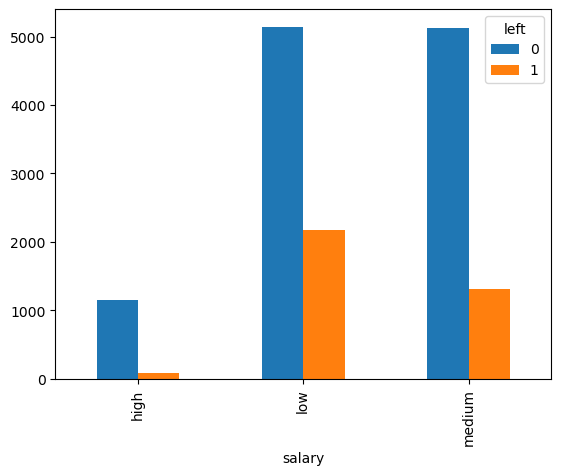

In [51]:
pd.crosstab(df['salary'], df['left']).plot(kind='bar')

<Axes: xlabel='promotion_last_5years'>

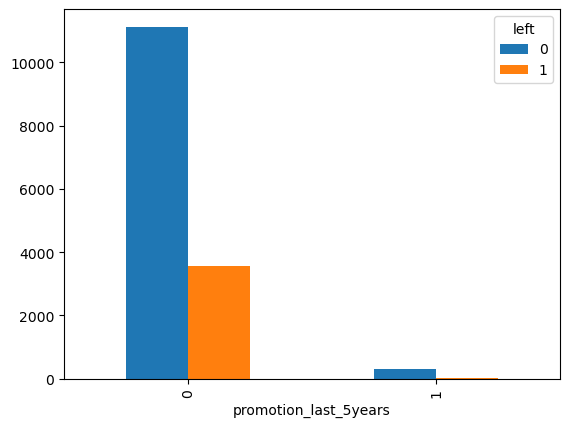

In [52]:
pd.crosstab(df['promotion_last_5years'], df['left']).plot(kind='bar')

In [53]:
newdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
newdf

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low
...,...,...,...,...
14994,0.40,151,0,low
14995,0.37,160,0,low
14996,0.37,143,0,low
14997,0.11,280,0,low


In [54]:
dumies = pd.get_dummies(newdf.salary, prefix='salary')
dumies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [55]:
newdf_dumies = pd.concat([newdf,dumies], axis='columns')
newdf_dumies

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0
...,...,...,...,...,...,...,...
14994,0.40,151,0,low,0,1,0
14995,0.37,160,0,low,0,1,0
14996,0.37,143,0,low,0,1,0
14997,0.11,280,0,low,0,1,0


In [56]:
newdf_dumies.drop(['salary'], axis='columns', inplace=True)
newdf_dumies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [57]:
X = newdf_dumies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [58]:
y = df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)
X_train

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
13887,0.92,138,0,0,0,1
2327,0.38,111,0,0,0,1
12990,0.79,227,1,1,0,0
14254,0.10,281,0,0,1,0
6932,0.97,214,0,0,1,0
...,...,...,...,...,...,...
12633,0.38,154,0,0,1,0
2325,0.58,206,0,0,0,1
8,0.89,224,0,0,1,0
5721,0.73,215,0,0,1,0


In [60]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [64]:
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
model.score(X_test,y_test)

0.7776190476190477